In [ ]:
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
import random
from math import sqrt

def manhattan(a, b):
    return sum(abs(val1-val2) for val1, val2 in zip(a,b))


class Snake:
    def __init__(self, grid_size):  
        self.grid_size = grid_size
        self.reset()

        self.action_space = [0, 1, 2, 3]  # up, down, left, right
        self.action_map = {
            0: (-1, 0),
            1: (1, 0),
            2: (0, -1),
            3: (0, 1),
        }
        
    def build_observation_space(self):
        '''        
        distance_from_mice = manhatten_distance from mice to snake head
        distance_from_wall = manhatten_distance from wall to snake head
        snake_length = length of the snake vector
        '''
        distance_from_mice = manhattan(
            self.snake[0], self.mice
        )
        distance_from_wall = min(
            manhattan(
                self.snake[0], (0, 0)
            ),
            manhattan(
                self.snake[0], (self.grid_size - 1, 0)
            ),
            manhattan(
                self.snake[0], (0, self.grid_size - 1)
            ),
            manhattan(
                self.snake[0], (self.grid_size - 1, self.grid_size - 1)
            ),
        )
        snake_length = len(self.snake)
        self.observation_space = (
            distance_from_mice,
            distance_from_wall,
            snake_length,
        )
        # print('self.observation_space: ', self.observation_space)
        return np.array(self.observation_space)

    def get_state(self):
        return self.observation_space

    def reset(self):    
        self.done = False
        self.score = 0
        self.snake = deque([(
            np.random.randint(0, self.grid_size - 1),
            np.random.randint(0, self.grid_size - 1),
        )])
        self.spawn_mice()
        self.observation_space = self.build_observation_space()
        return self.get_state(), 0, False, {}

    def step(self, action): 
        dx, dy = self.action_map[action]

        # Check if we take action and snake dies?
        # adds the action to the current position
        new_head_x = self.snake[0][0] + dx
        # adds the action to the current position
        new_head_y = self.snake[0][1] + dy

        if (
            new_head_x < 0 or new_head_y < 0 or 
            new_head_x >= self.grid_size or new_head_y >= self.grid_size
        ):
            self.done = True
            return self.get_state(), -1, self.done, {}  # state, reward, done, info

        # check if snake ate itself
        if (new_head_x, new_head_y) in self.snake:
            self.done = True
            return self.get_state(), -1, self.done, {}  # state, reward, done, info

        # If snake does not die and its a valid move
        # move snake
        self.snake.appendleft((new_head_x, new_head_y))

        # check if snake ate the mice
        if (new_head_x, new_head_y) == self.mice:
            self.score += 1
            self.spawn_mice()  # spawns new mice
            return self.get_state(), 1, self.done, {}
        else:
            self.snake.pop()  # remove tail - simulates movement
            # to encourage faster food acquisition we will reinforce a small penalty for every step
            return self.get_state(), -0.01, self.done, {}

    def render(self):        
        # Create a gridxgrid matrix of all zeros
        grid = np.zeros((self.grid_size, self.grid_size))
        # puts 1 wherever the snake is
        for x, y in self.snake:
            grid[x, y] = 1

        # puts 2 where the mice is
        grid[self.mice[0], self.mice[1]] = 2
        return grid

    def spawn_mice(self):
        # should check for snake position
        all_positions = set(
            (x, y) for x in range(self.grid_size) for y in range(self.grid_size)
        )
        occupied_by_snake = set(self.snake)
        free_positions = all_positions - occupied_by_snake
        if not free_positions:
            self.done = True
            self.mice = None
        else:
            self.mice = random.choice(list(free_positions))
        return self.mice


In [2]:
snake_env = Snake(9)
snake_env.render()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [3]:
print(snake_env.observation_space)

[2 4 1]


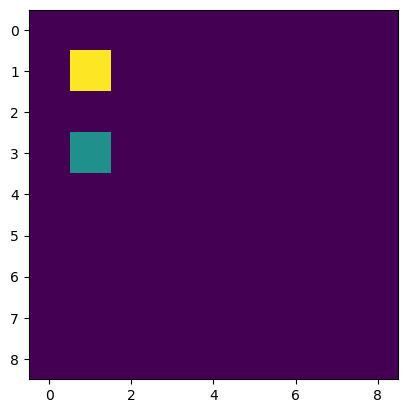

In [4]:
plt.imshow(snake_env.render())

In [5]:
import random
action = random.choice(snake_env.action_space)
print(action)
print('Current state: ', snake_env.get_state())
print('Next state: ', snake_env.step(action))

3
Current state:  [2 4 1]
Next state:  (array([2, 4, 1]), -0.01, False, {})


In [6]:
print('Next state: ', snake_env.step(action))

Next state:  (array([2, 4, 1]), -0.01, False, {})


In [7]:
print('Next state: ', snake_env.step(action))

Next state:  (array([2, 4, 1]), -0.01, False, {})


In [8]:
snake_env.reset()
action = random.choice(snake_env.action_space)
print(action)
print('Current state: ', snake_env.get_state())
print('Next state: ', snake_env.step(action))

3
Current state:  [6 4 1]
Next state:  (array([6, 4, 1]), -0.01, False, {})


Reset state:  [2 5 1]


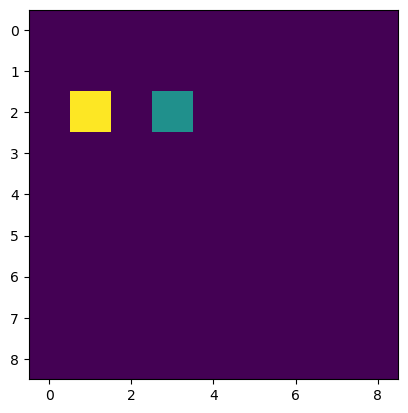

Taking action:  0 up
Next state:  [2 5 1] -0.01 False


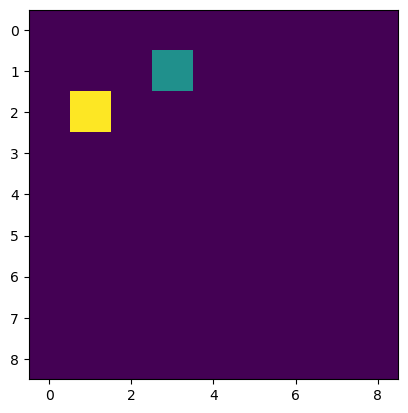

Taking action:  0 up
Next state:  [2 5 1] -0.01 False


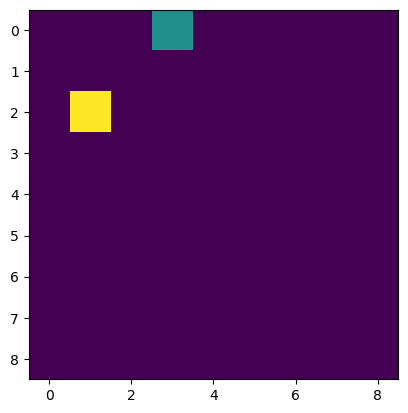

Taking action:  0 up
Next state:  [2 5 1] -1 True


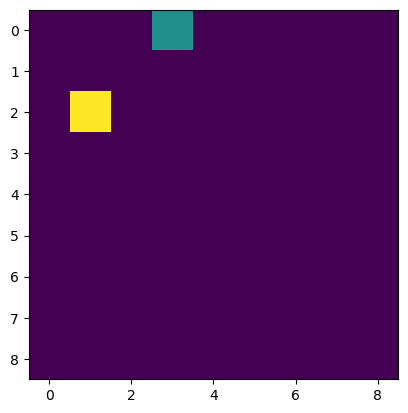

In [9]:
state, reward, done, _ = snake_env.reset()
action_map = {
    0: 'up',
    1: 'down',
    2: 'left',
    3: 'right',
}
print('Reset state: ', snake_env.get_state())
plt.imshow(snake_env.render())
plt.show()
while not done:
    action = random.choice(snake_env.action_space)
    print('Taking action: ', action, action_map[action])
    state, reward, done, _ = snake_env.step(action)
    print('Next state: ', state, reward, done)
    plt.imshow(snake_env.render())
    plt.show()

# REINFORCE

In [10]:
learning_rate = 0.01
# Convert your state into a NumPy vector (just your 3–5 engineered features).
state, reward, done, _ = snake_env.reset()
print('Reset state: ', state)

Reset state:  [7 4 1]


In [11]:

# Define a theta matrix randomly.
weights = np.random.uniform(low=-1, high=1, size=(4, 3))
weights.shape, weights

((4, 3),
 array([[-0.77296758,  0.58082959,  0.30483709],
        [ 0.47864371,  0.36432389,  0.19513878],
        [-0.05124824, -0.46706895,  0.54374989],
        [ 0.13079179, -0.18733074, -0.84411226]]))

In [12]:
# Use softmax(theta @ state_vector) to get action probabilities.
dot_product = np.dot(weights, state)
dot_product.shape, dot_product

((4,), array([-2.78261763,  5.00294032, -1.68326363, -0.67789265]))

In [13]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))  # Subtracting the max value for numerical stability
    return e_x / e_x.sum()
softmax(dot_product)

array([4.13596563e-04, 9.94951197e-01, 1.24171034e-03, 3.39349618e-03])




Sample from the distribution to choose an action.

In [14]:

prob = softmax(dot_product)
action = np.random.choice(len(prob), p=prob)
action

1

In [15]:

def choose_action(state, weights):
    # Compute action probabilities using softmax(weights @ state)
    dot_product = np.dot(weights, state)
    # Sample action from probabilities
    prob = softmax(dot_product)
    action = np.random.choice(len(prob), p=prob)
    # action = np.argmax(prob)
    return action

for i in range(10):
    state, reward, done, _ = snake_env.reset()
    print('Reset state: ', state)
    weights = np.random.uniform(low=-1, high=1, size=(4, 3))
    action = choose_action(state, weights)
    print(action, '-> ', action_map[action])

Reset state:  [6 2 1]
0 ->  up
Reset state:  [12  1  1]
1 ->  down
Reset state:  [1 2 1]
2 ->  left
Reset state:  [8 5 1]
2 ->  left
Reset state:  [7 3 1]
0 ->  up
Reset state:  [4 4 1]
0 ->  up
Reset state:  [5 4 1]
1 ->  down
Reset state:  [11  4  1]
2 ->  left
Reset state:  [9 6 1]
0 ->  up
Reset state:  [7 4 1]
0 ->  up


In [16]:
all_episode_rewards = [] 
state, reward, done, _ = snake_env.reset()

init_action = choose_action(state, weights)
print('Init Action: ', action, '--> ',action_map[init_action])


next_action = choose_action(state, weights)
print('1. New Action: ', action)
step_taken = snake_env.step(action)
print("2nd Step: ", step_taken)


Init Action:  0 -->  up
1. New Action:  0
2nd Step:  (array([7, 5, 1]), -0.01, False, {})


Init Action:  0 -->  up
1. New Action:  0
2nd Step:  (array([4, 4, 1]), -0.01, False, {})
3. New State:  [4 4 1]
4. Reward:  -0.01
5. Done:  False
6. All Reward:  -0.01
7. Action Count:  1
8. ------------------------


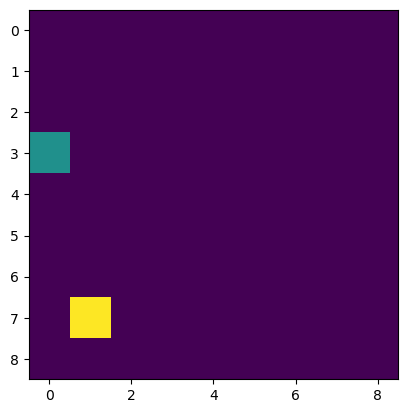

1. New Action:  0
2nd Step:  (array([4, 4, 1]), -0.01, False, {})
3. New State:  [4 4 1]
4. Reward:  -0.01
5. Done:  False
6. All Reward:  -0.02
7. Action Count:  2
8. ------------------------


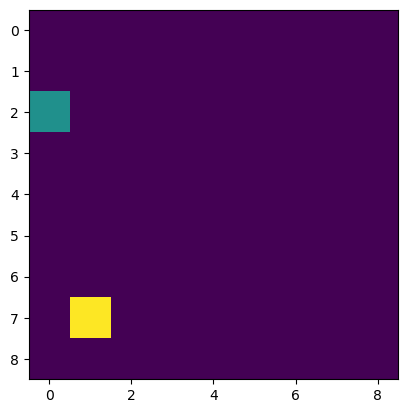

1. New Action:  0
2nd Step:  (array([4, 4, 1]), -0.01, False, {})
3. New State:  [4 4 1]
4. Reward:  -0.01
5. Done:  False
6. All Reward:  -0.03
7. Action Count:  3
8. ------------------------


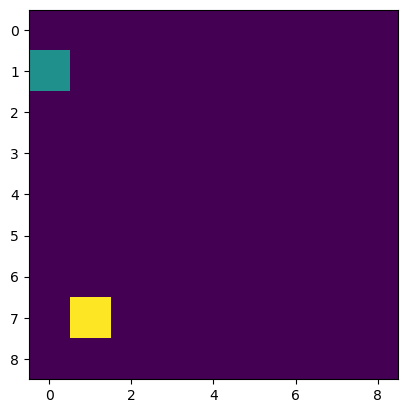

1. New Action:  0
2nd Step:  (array([4, 4, 1]), -0.01, False, {})
3. New State:  [4 4 1]
4. Reward:  -0.01
5. Done:  False
6. All Reward:  -0.04
7. Action Count:  4
8. ------------------------


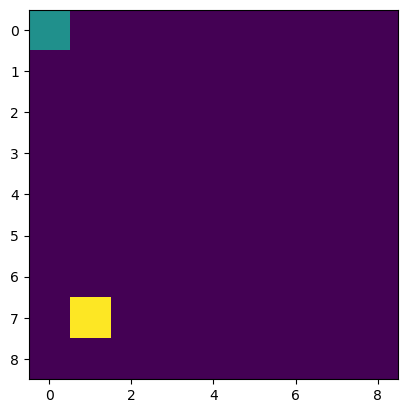

1. New Action:  0
2nd Step:  (array([4, 4, 1]), -1, True, {})
3. New State:  [4 4 1]
4. Reward:  -1
5. Done:  True
6. All Reward:  -1.04
7. Action Count:  5
8. ------------------------


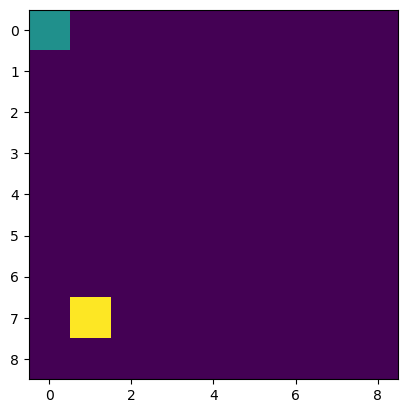

In [17]:

state, reward, done, _ = snake_env.reset()

init_action = choose_action(state, weights)
print('Init Action: ', action, '--> ',action_map[init_action])

action_count = 0
all_reward = 0

while not done:
    next_action = choose_action(state, weights)
    print('1. New Action: ', action)
    step_taken = snake_env.step(action)
    print("2nd Step: ", step_taken)
    state, reward, done, _ = step_taken
    all_reward += reward
    action_count += 1
    print('3. New State: ', state)
    print('4. Reward: ', reward)
    print('5. Done: ', done)
    print('6. All Reward: ', all_reward)
    print('7. Action Count: ', action_count)
    print('8. ------------------------')
    plt.imshow(snake_env.render())
    plt.show()

# Simple Policy


            Episode: 0
            Average Reward: -1.02
            Average Gradient: 0.0
            Total Reward: -1.02


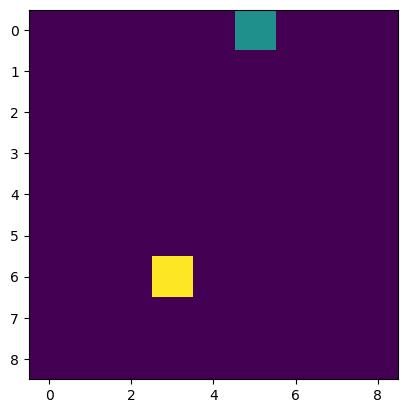


            Episode: 100
            Average Reward: -0.9753999999999999
            Average Gradient: 1.5854842575988452e-11
            Total Reward: -1.02


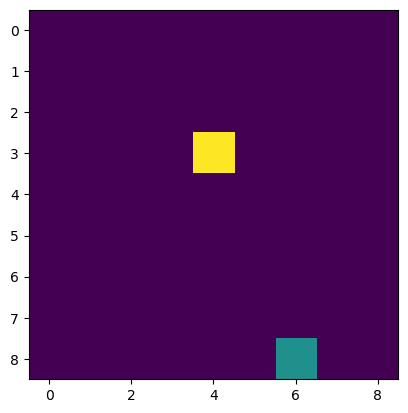


            Episode: 200
            Average Reward: -1.0228
            Average Gradient: -3.6241827105395496e-12
            Total Reward: -1.08


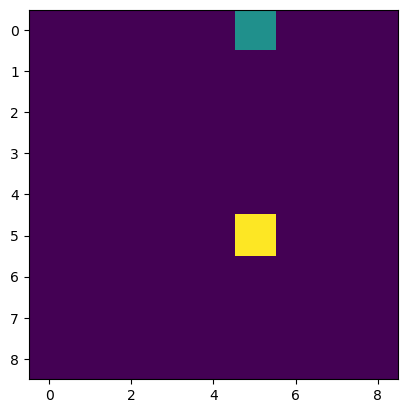


            Episode: 300
            Average Reward: -0.9838
            Average Gradient: 1.0013172368928302e-11
            Total Reward: -1


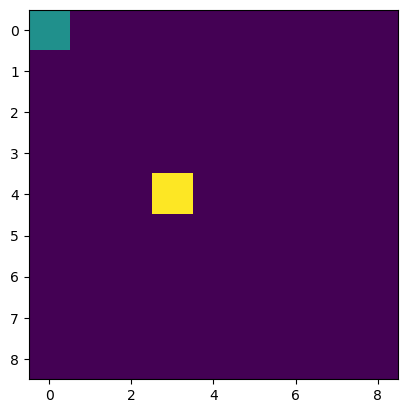


            Episode: 400
            Average Reward: -0.9666000000000001
            Average Gradient: 1.0314920180514012e-11
            Total Reward: -1.16


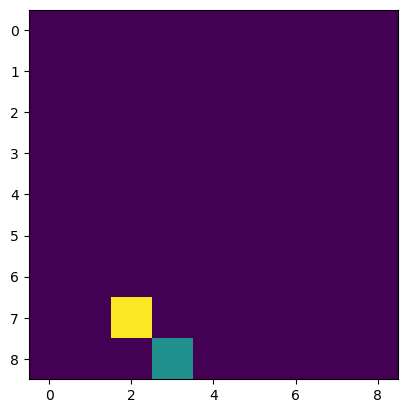


            Episode: 500
            Average Reward: -1.0123
            Average Gradient: -1.3465201939333925e-11
            Total Reward: -1.5200000000000002


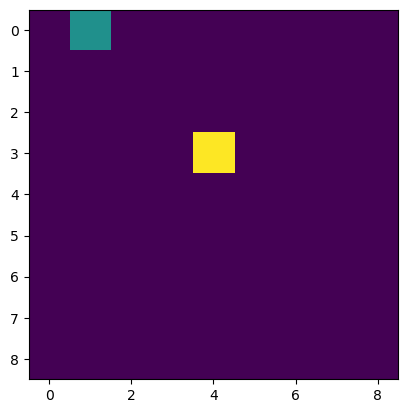


            Episode: 600
            Average Reward: -0.9985
            Average Gradient: 2.2138887048612055e-11
            Total Reward: -1.03


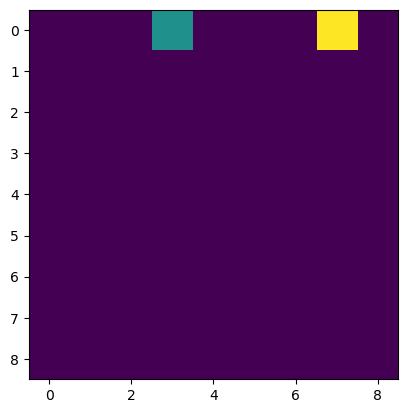


            Episode: 700
            Average Reward: -0.9793000000000001
            Average Gradient: 1.725244757095431e-11
            Total Reward: -0.09000000000000008


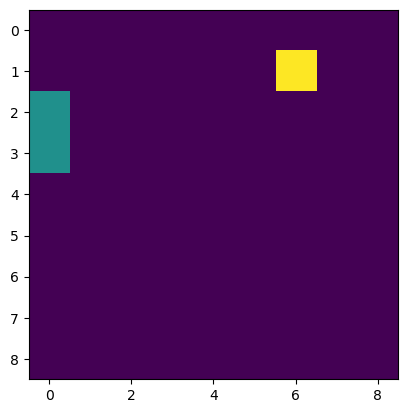


            Episode: 800
            Average Reward: -1.0112999999999999
            Average Gradient: -1.2399545516938938e-11
            Total Reward: -1.1099999999999999


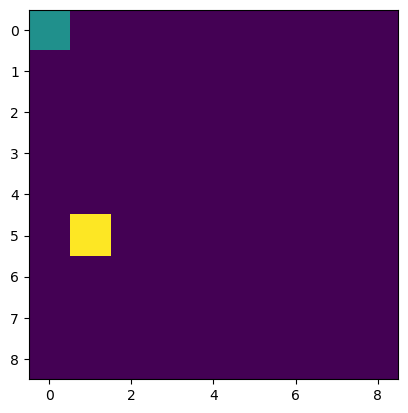


            Episode: 900
            Average Reward: -0.9983999999999998
            Average Gradient: -5.562682220190834e-12
            Total Reward: -1.07


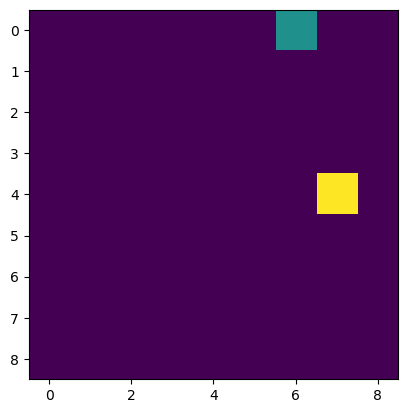

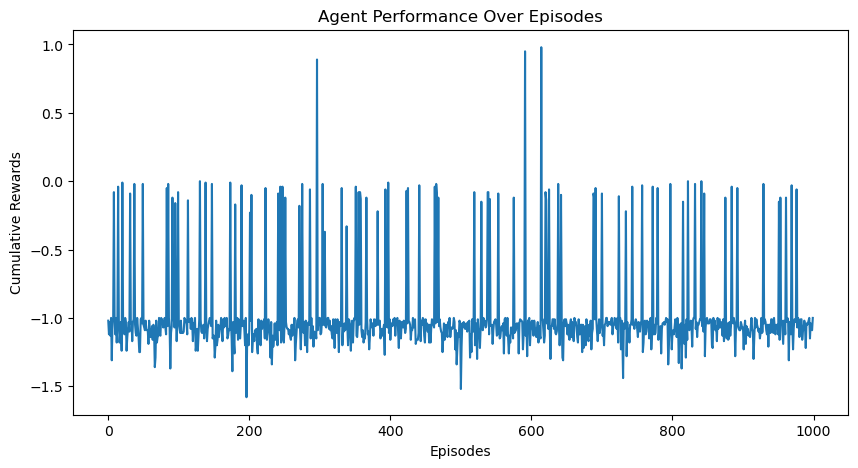

In [18]:
state, reward, done, _ = snake_env.reset()

#Initialize weights randomly → shape: (num_actions, num_features)
weights = np.random.uniform(low=0, high=1, size=(4, 3))
learning_rate = 0.01
gamma = 0.99 # discount factor

# init_action, _ = choose_action(state, weights)
# print('Init Action: ', action, '--> ',action_map[init_action])

action_count = 0
all_reward = 0
all_episode_rewards = []
all_episode_grads = []


def choose_action(state, weights):
    # Compute action probabilities using softmax(weights @ state)
    dot_product = np.dot(weights, state)
    # Sample action from probabilities
    prob = softmax(dot_product)
    action = np.random.choice(len(prob), p=prob)
    # action = np.argmax(prob)
    return action, prob

def computed_discounted_rewards(rewards, gamma=0.99):
    discounted = np.zeros_like(rewards)
    cummulative = 0.0
    for i in reversed(range(len(rewards))):
        cummulative = (cummulative * gamma) + rewards[i]
        discounted[i] = cummulative
  
    mean = np.mean(discounted)
    std = np.std(discounted)
    discounted = (discounted - mean) / (std + 1e+10)
    return discounted

def compute_gradients(discounted_rewards, ep_gradients):
    grads = np.vstack(ep_gradients)
    weighted_grads = np.dot(discounted_rewards, grads)
    return weighted_grads
    

for episode in range(1000):
	# Reset environment
    state, reward, done, _ = snake_env.reset()  # Get initial state
    done = False 
    episode_states = [state]
    episode_actions = []
    episode_rewards, episode_gradients = [], []
    
    while not done:
            action, prob = choose_action(state, weights)
            # Take action in environment → get next_state, reward, done
            next_state, reward, done, _ = snake_env.step(action)
            
            episode_states.append(next_state)
            episode_rewards.append(reward)
            episode_actions.append(action)
            
            # Gradient Calcuation
            next_action, next_prob = choose_action(next_state, weights)
            grad = state * (action - next_action)            
            episode_gradients.append(grad)
            state = next_state
    
    
    # Compute gradients
    discounted_rewards = computed_discounted_rewards(episode_rewards)
    gradients = compute_gradients(discounted_rewards, episode_gradients)
    all_episode_grads.append(gradients)
    all_episode_rewards.append(sum(episode_rewards))
    
    # Update weights
    weights += learning_rate * gradients
    
    if episode % 100 == 0:
        print(
            f"""
            Episode: {episode}
            Average Reward: {np.mean(all_episode_rewards[-100:])}
            Average Gradient: {np.mean(all_episode_grads[-100:])}
            Total Reward: {sum(episode_rewards)}"""
        )
        plt.imshow(snake_env.render())
        plt.show()
    
            
plt.figure(figsize=(10, 5))
plt.plot(all_episode_rewards)
plt.title('Agent Performance Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Rewards')
plt.show()    
            

In [19]:
weights

array([[0.51675032, 0.72675448, 0.293338  ],
       [0.6922921 , 0.40702669, 0.78890886],
       [0.6782908 , 0.53072991, 0.12116314],
       [0.06478553, 0.0823055 , 0.52369984]])

# Log Policy

In [20]:
weights = np.array([[0.10980746, 0.5968503 , 0.6679292 ],
       [0.57746292, 0.0369652 , 0.12261116],
       [0.24334583, 0.1228471 , 0.49964363],
       [0.26121423, 0.26626093, 0.69320827]])# Worked great


            Episode: 0
            Average Reward: -1.07
            Total Reward: -1.07


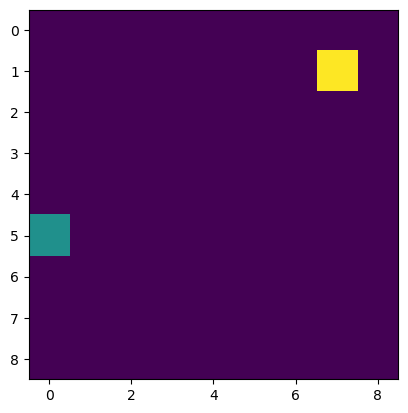

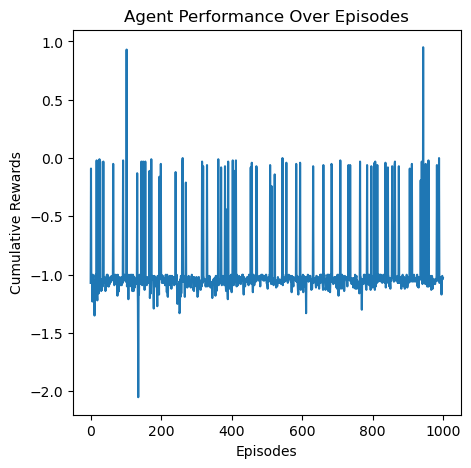

Overall Snake score: 0
Best Episode: 


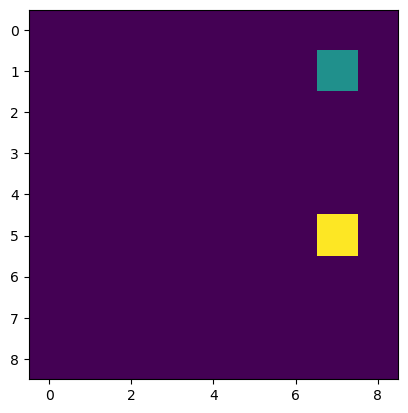

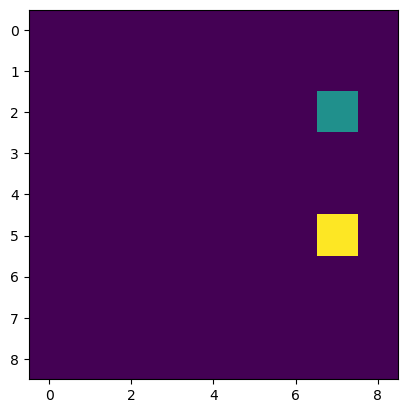

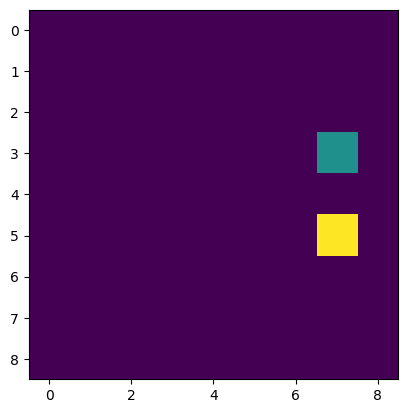

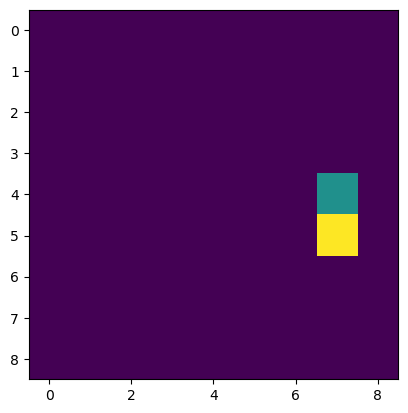

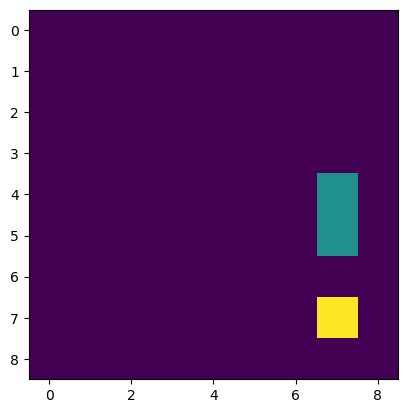

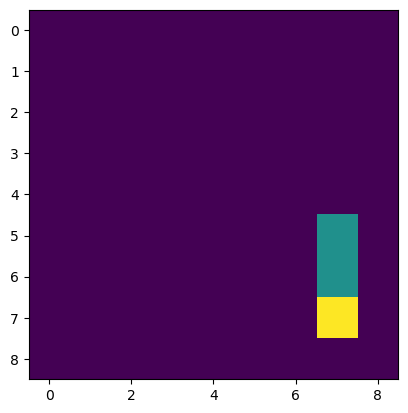

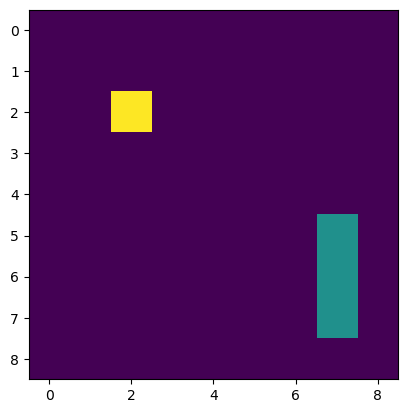

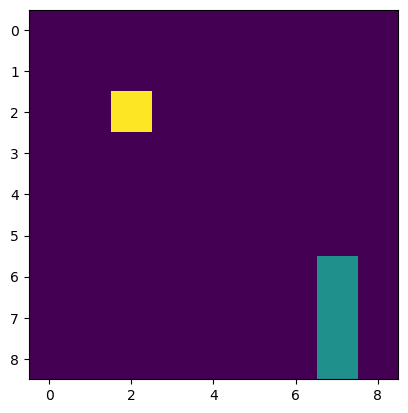

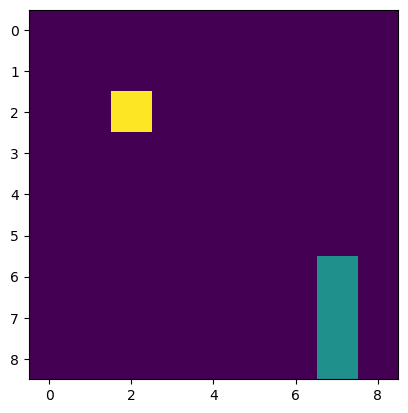

In [22]:
state, reward, done, _ = snake_env.reset()

#Initialize weights randomly → shape: (num_actions, num_features)
weights = np.random.uniform(low=0, high=1, size=(4, 3))
learning_rate = 0.01
gamma = 0.99 # discount factor

# init_action, _ = choose_action(state, weights)
# print('Init Action: ', action, '--> ',action_map[init_action])

action_count = 0
all_reward = 0
all_episode_rewards = []
all_episode_grids = []
all_episode_probs = []

def choose_action(state, weights):
    # Compute action probabilities using softmax(weights @ state)
    dot_product = np.dot(weights, state)
    # Sample action from probabilities
    prob = softmax(dot_product)
    action = np.random.choice(len(prob), p=prob)
    # action = np.argmax(prob)
    return action, prob

def computed_discounted_rewards(rewards, gamma=0.99):
    discounted = np.zeros_like(rewards)
    cummulative = 0.0
    for i in reversed(range(len(rewards))):
        cummulative = (cummulative * gamma) + rewards[i]
        discounted[i] = cummulative
  
    mean = np.mean(discounted)
    std = np.std(discounted)
    discounted = (discounted - mean) / (std + 1e-10)
    return discounted


def compute_gradients(discounted_rewards, ep_gradients):
    grads = np.vstack(ep_gradients)
    weighted_grads = np.dot(discounted_rewards, grads)
    return weighted_grads
    

for episode in range(1000):
	# Reset environment
    state, reward, done, _ = snake_env.reset()  # Get initial state
    done = False 
    episode_states = [state]
    episode_actions = []
    episode_probs = []
    episode_grids = [snake_env.render()]

    episode_rewards, episode_gradients = [], []
    
    while not done:
        k = np.random.randint(0, 1000)
        if k % 7 == 0:
            action = random.choice(snake_env.action_space)
            prob = np.ones_like(snake_env.action_space) / len(snake_env.action_space)
        else:
            action, prob = choose_action(state, weights)
        # Take action in environment → get next_state, reward, done
        next_state, reward, done, _ = snake_env.step(action)
        
        # if reward == 1:
        #     print('Yummy!')                    
        episode_states.append(next_state)
        episode_rewards.append(reward)
        episode_actions.append(action)
        episode_probs.append(prob)
        episode_grids.append(snake_env.render())
        
        # Update state
        state = next_state
    
    #  Compute discounted cumulative rewards G_t from rewards
    discounted_rewards = computed_discounted_rewards(episode_rewards)  # G_t 
    
    total_grad = np.zeros_like(weights)
    for i in range(len(episode_rewards)):
        # Gradient Calcuation
        action_taken = episode_actions[i]
        dlog = -episode_probs[i]
        dlog[action_taken] += 1
        grad = np.outer(dlog, episode_states[i])
        episode_gradients.append(grad)
        # weights += learning_rate * grad * discounted_rewards[i]
        total_grad += grad * discounted_rewards[i]

    weights += learning_rate * total_grad

    # Compute gradients
    all_episode_rewards.append(sum(episode_rewards))
    all_episode_grids.append(episode_grids)
    all_episode_probs.append(episode_probs)

    if episode % 20000 == 0:
        print(
        f"""
            Episode: {episode}
            Average Reward: {np.mean(all_episode_rewards)}
            Total Reward: {sum(episode_rewards)}"""
        )
        plt.imshow(snake_env.render())
        plt.show()
    
            
plt.figure(figsize=(5, 5))
plt.plot(all_episode_rewards)
plt.title('Agent Performance Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Rewards')
plt.show()   

print('Overall Snake score:', snake_env.score)

print('Best Episode: ')
# plot the best episode
idx = np.argmax(all_episode_rewards)
for i in range(len(all_episode_grids[idx])):
    # print(all_episode_probs[idx][i])
    plt.imshow(all_episode_grids[idx][i])
    plt.show()

In [23]:
weights

array([[0.20523278, 0.05421431, 0.57222855],
       [0.86766983, 0.2451246 , 0.42236977],
       [0.10659443, 1.20374806, 0.72129741],
       [0.41137774, 0.17328565, 0.09875537]])

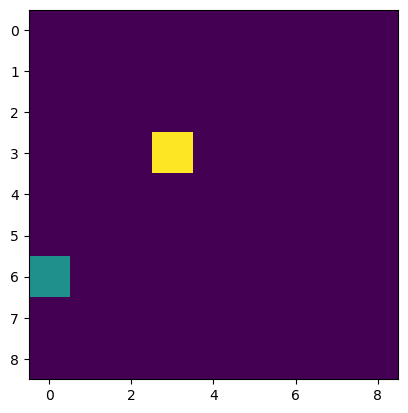

In [24]:
action, prob = choose_action(state, weights)
# Take action in environment → get next_state, reward, done
next_state, reward, done, _ = snake_env.step(action)

plt.imshow(snake_env.render())
plt.show()

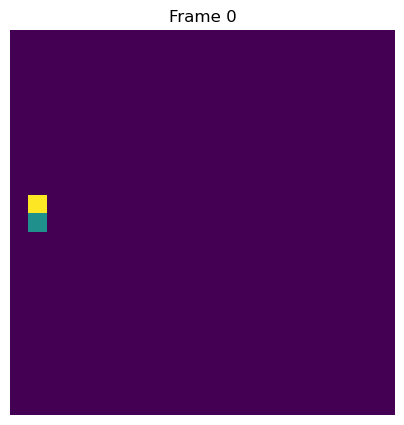

In [7]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display


def animate_episode(episode_grids, interval=200):
    fig = plt.figure(figsize=(5, 5))
    
    def update(frame):
        plt.clf()
        plt.imshow(episode_grids[frame])
        plt.title(f'Frame {frame}')
        plt.axis('off')
        return plt.gca(),
    
    anim = FuncAnimation(fig, update, frames=len(episode_grids), 
                         interval=interval)
    
    # Save as gif
    anim.save('snake_game.gif', writer='pillow')
    
    # Or save as mp4 (requires ffmpeg)
    # anim.save('snake_game.mp4', writer='ffmpeg')
    
    return anim


# Use it on your best episode
idx = np.argmax(all_episode_rewards)
anim = animate_episode(all_episode_grids[idx])
HTML(anim.to_jshtml())

In [26]:
weights

array([[0.20523278, 0.05421431, 0.57222855],
       [0.86766983, 0.2451246 , 0.42236977],
       [0.10659443, 1.20374806, 0.72129741],
       [0.41137774, 0.17328565, 0.09875537]])

Action: left
Action: left
Action: down
Action: left
Action: down
Action: down
Action: left


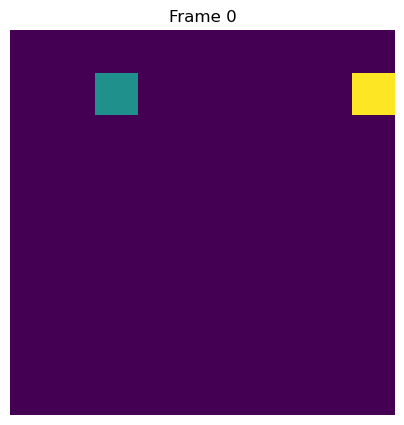

In [27]:
# Use it on your best episode
state, _, done, _ = snake_env.reset()
frames = []
done = False
for ep in range(10000):
    action, prob = choose_action(state, weights)
    print('Action:', action_map[action])
    # Take action in environment → get next_state, reward, done
    next_state, reward, done, _ = snake_env.step(action)
    state = next_state
    if done:
        break
    else:
        frames.append(snake_env.render())

anim = animate_episode(frames)
HTML(anim.to_jshtml())

### numpy.outer() function in Python
```python
numpy.outer() function compute the outer product of two vectors.

Syntax   :  numpy.outer(a, b, out = None)

Parameters : 
a : [array_like] First input vector. Input is flattened if not already 1-dimensional.
b : [array_like] Second input vector. Input is flattened if not already 1-dimensional.
out  : [ndarray, optional] A location where the result is stored.

Return  : [ndarray] Returns the outer product of two vectors. out[i, j] = a[i] * b[j]
```


In [ ]:
import numpy as geek 

a = geek.linspace(-1, 1, 4)
b = geek.linspace(-1, 2, 4)

gfg = geek.outer(a, b)

print(a, b)
print (gfg)

# Increase the Features for better accuracy

### Snake Environment

In [ ]:
from collections import deque  
import numpy as np
import matplotlib.pyplot as plt
import random
from math import sqrt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

def manhattan(a, b):
    return sum(abs(val1-val2) for val1, val2 in zip(a,b))

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))  # Subtracting the max value for numerical stability
    return e_x / e_x.sum()

def animate_episode(episode_grids, interval=200):
    fig = plt.figure(figsize=(5, 5))
    
    def update(frame):
        plt.clf()
        plt.imshow(episode_grids[frame])
        plt.title(f'Frame {frame}')
        plt.axis('off')
        return plt.gca(),
    
    anim = FuncAnimation(fig, update, frames=len(episode_grids), 
                         interval=interval)
    
    # Save as gif
    anim.save('snake_game.gif', writer='pillow')
    
    # Or save as mp4 (requires ffmpeg)
    # anim.save('snake_game.mp4', writer='ffmpeg')
    
    return anim

action_to_str = {
    0: 'up',
    1: 'down',
    2: 'left',
    3: 'right',
}


class Snake:
    def __init__(self, grid_size):  
        self.grid_size = grid_size
        self.reset()

        self.action_space = [0, 1, 2, 3]  # up, down, left, right
        self.action_map = {
            0: (-1, 0),
            1: (1, 0),
            2: (0, -1),
            3: (0, 1),
        }
        
    def _get_snake_distance_from_mice(self):
        dy = (self.mice[0] - self.snake[0][0]) / self.grid_size # dx_to_food
        dx = (self.mice[1] - self.snake[0][1]) / self.grid_size # dt_to_food
        return dx, dy
        
    def build_observation_space(self):
        '''    
        dx, dy = distance from snake head to mice    
        distance_from_mice = manhatten_distance from mice to snake head
        distance_from_wall = manhatten_distance from wall to snake head
        direction_from_wall = direction from wall to snake head
        snake_length = length of the snake vector
        '''
        distance_from_mice = manhattan(
            self.snake[0], self.mice
        )        
        distances_from_wall = [
            manhattan(
                self.snake[0], (0, 0)
            ),
            manhattan(
                self.snake[0], (self.grid_size - 1, 0)
            ),
            manhattan(
                self.snake[0], (0, self.grid_size - 1)
            ),
            manhattan(
                self.snake[0], (self.grid_size - 1, self.grid_size - 1)
            ),
        ]
        print('distances_from_wall:', distances_from_wall)
        
        distance_from_wall = min(distances_from_wall)
        direction_from_wall = np.argmin(distances_from_wall)
        
        dx, dy = self._get_snake_distance_from_mice()
        magnitude = max(np.sqrt(dx**2 + dy**2), 1e-5)
        dir_x, dir_y = dx / magnitude, dy / magnitude  
        
        # Create directional indicators (1 if food is in that direction, 0 otherwise)
        # These help the agent learn which direction to move more explicitly
        snake_y, snake_x = self.snake[0]
        mice_y, mice_x = self.mice
        # print(snake_x, snake_y, mice_x, mice_y)
        up_indicator = 1.0 if mice_y < snake_y else 0.0
        down_indicator = 1.0 if mice_y > snake_y else 0.0
        left_indicator = 1.0 if mice_x < snake_x else 0.0
        right_indicator = 1.0 if mice_x > snake_x else 0.0
         
        snake_length = len(self.snake)
        self.observation_space = (
            dx, dy,
            dir_x, dir_y,
            up_indicator, down_indicator, left_indicator, right_indicator,
            distance_from_mice,
            distance_from_wall,
            direction_from_wall,
            snake_length,
        )
        # print('self.observation_space: ', self.observation_space)
        return np.array(self.observation_space)

    def get_state(self):
        self.observation_space = self.build_observation_space()
        return self.observation_space

    def reset(self):     
        self.done = False
        self.score = 0
        self.snake = deque([(
            np.random.randint(0, self.grid_size - 1),
            np.random.randint(0, self.grid_size - 1),
        )])
        self.spawn_mice()
        self.observation_space = self.build_observation_space()
        return self.get_state(), 0, False, {}

    def step(self, action):  
        dx, dy = self.action_map[action]

        # Check if we take action and snake dies?
        # adds the action to the current position
        new_head_x = self.snake[0][0] + dx
        # adds the action to the current position
        new_head_y = self.snake[0][1] + dy

        if (
            new_head_x < 0 or new_head_y < 0 or 
            new_head_x >= self.grid_size or new_head_y >= self.grid_size
        ):
            self.done = True
            return self.get_state(), -1, self.done, {}  # state, reward, done, info

        # check if snake ate itself
        if (new_head_x, new_head_y) in self.snake:
            self.done = True
            return self.get_state(), -1, self.done, {}  # state, reward, done, info

        # If snake does not die and its a valid move
        # move snake
        self.snake.appendleft((new_head_x, new_head_y))

        # check if snake ate the mice
        if (new_head_x, new_head_y) == self.mice:
            self.score += 1
            self.spawn_mice()  # spawns new mice
            return self.get_state(), 1, self.done, {}
        else:
            self.snake.pop()  # remove tail - simulates movement
            # to encourage faster food acquisition we will reinforce a small penalty for every step
            # if snake moves closer to mice, give slightly positive reward else slightly negative reward
            prev_distance = manhattan(self.snake[0], self.mice)
            new_distance = manhattan((new_head_x, new_head_y), self.mice)
            if new_distance < prev_distance:
                reward = 0.02
            else:
                reward = -0.01
            return self.get_state(), reward, self.done, {}

    def render(self):        
        # Create a gridxgrid matrix of all zeros
        grid = np.zeros((self.grid_size, self.grid_size))
        # puts 1 wherever the snake is
        for x, y in self.snake:
            grid[x, y] = 1

        # puts 2 where the mice is
        grid[self.mice[0], self.mice[1]] = 2
        return grid

    def spawn_mice(self):
        # should check for snake position
        all_positions = set(
            (x, y) for x in range(self.grid_size) for y in range(self.grid_size)
        )
        occupied_by_snake = set(self.snake)
        free_positions = all_positions - occupied_by_snake
        if not free_positions:
            self.done = True
            self.mice = None
        else:
            self.mice = random.choice(list(free_positions))
        return self.mice
    
    def __repr__(self):
        """Return a string representation of the Snake environment."""
        head_pos = self.snake[0] if self.snake else "None"
        return (f"Snake(grid_size={self.grid_size}, "
                f"score={self.score}, "
                f"snake_length={len(self.snake)}, "
                f"head_pos={head_pos}, "
                f"mice_pos={self.mice}, "
                f"done={self.done})")


Test the environment

distances_from_wall: [6, 14, 2, 10]
distances_from_wall: [6, 14, 2, 10]


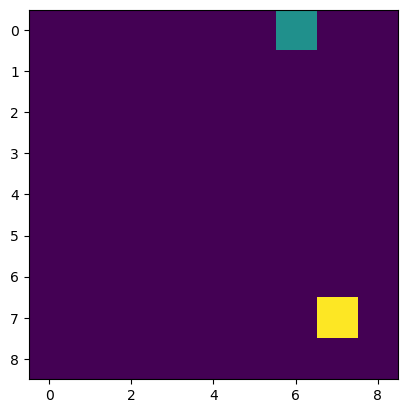

In [12]:
snake = Snake(9)
plt.imshow(snake.render())

In [3]:
snake

Snake(grid_size=9, score=0, snake_length=1, head_pos=(4, 1), mice_pos=(8, 5), done=False)

In [4]:
snake.action_space, snake.observation_space

([0, 1, 2, 3],
 array([0.44444444, 0.44444444, 0.70710678, 0.70710678, 0.        ,
        1.        , 0.        , 1.        , 8.        , 5.        ,
        0.        , 1.        ]))

### Directional Encoding

distances_from_wall: [7, 15, 1, 9]
distances_from_wall: [7, 15, 1, 9]
(0, 7) (1, 0)
7 0 0 1
0.0 1.0 1.0 0.0


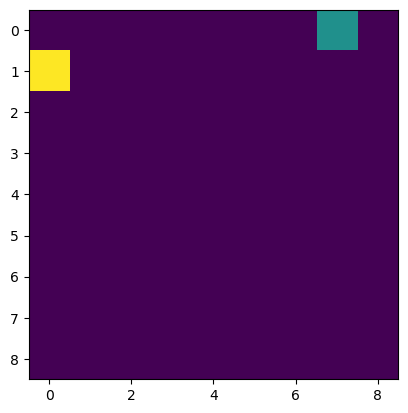

In [13]:
snake = Snake(9)
plt.imshow(snake.render())
print(snake.snake[0], snake.mice)
snake_y, snake_x = snake.snake[0]
mice_y, mice_x = snake.mice
print(snake_x, snake_y, mice_x, mice_y)
up_indicator = 1.0 if mice_y < snake_y else 0.0
down_indicator = 1.0 if mice_y > snake_y else 0.0
left_indicator = 1.0 if mice_x < snake_x else 0.0
right_indicator = 1.0 if mice_x > snake_x else 0.0
print(up_indicator, down_indicator, left_indicator, right_indicator)

In [7]:
snake.observation_space.shape

(12,)

### Module to show state vector

In [14]:
direction_to_str = {
    0: 'up',
    1: 'down',
    2: 'left',
    3: 'right',
}

def display_state_vector(state, feature_names=None):
    """
    Display a state vector in a human-readable format.

    This standalone function can be used in policy files or anywhere else
    to display state information without needing a Snake instance.

    Args:
        state: The state vector to display
        feature_names: List of feature names. If None, uses default names.

    Returns:
        A formatted string representation of the state.
    """
    if feature_names is None:
        feature_names = [
            "dx_to_food",
            "dy_to_food",
            "dir_x_normalized",
            "dir_y_normalized",
            "up_indicator",
            "down_indicator",
            "left_indicator",
            "right_indicator",
            "distance_from_mice",
            "distance_from_wall",
            "direction_from_wall",
            "snake_length"
        ]

    # Ensure state is a numpy array
    state = np.array(state)

    # Create a formatted string with feature names and values
    lines = []
    lines.append("=" * 50)
    lines.append("STATE REPRESENTATION".center(50))
    lines.append("=" * 50)

    # Calculate the maximum length of feature names for alignment
    max_name_length = max(len(name) for name in feature_names)

    # Group related features
    groups = {
        "Position Relative to Food": ["dx_to_food", "dy_to_food", "dir_x_normalized", "dir_y_normalized"],
        "Direction Indicators": ["up_indicator", "down_indicator", "left_indicator", "right_indicator"],
        "Distance Metrics": ["distance_from_mice", "distance_from_wall", "direction_from_wall"],
        "Snake Properties": ["snake_length"]
    }

    # Display features by group
    for group_name, feature_list in groups.items():
        lines.append(f"\n{group_name}:")
        lines.append("-" * 50)

        for feature in feature_list:
            if feature in feature_names:
                idx = feature_names.index(feature)
                if idx < len(state):
                    value = state[idx]
                    # Format the value based on its type
                    if isinstance(value, (int, np.integer)):
                        value_str = f"{value}"
                    else:
                        value_str = f"{value:.4f}"

                    # Add indicators for binary features (0 or 1)
                    if feature.startswith(("up_", "down_", "left_", "right_", "danger_")):
                        if value > 0.5:  # Activated
                            indicator = "✓"
                        else:  # Not activated
                            indicator = "✗"
                        lines.append(
                            f"  {feature.ljust(max_name_length)}: {value_str} {indicator}")
                    else:
                        if feature.startswith('direction_'):
                            lines.append(
                                f"  {feature.ljust(max_name_length)}: {value_str} {direction_to_str[value]}")
                        else:
                            lines.append(
                                f"  {feature.ljust(max_name_length)}: {value_str}")

    lines.append("\n" + "=" * 50)

    # Join all lines and return
    return "\n".join(lines)

In [9]:
# snake_env.observation_space.shape

distances_from_wall: [6, 14, 2, 10]
Action: 2 -> (left), Reward: -0.01, Done: False
               STATE REPRESENTATION               

Position Relative to Food:
--------------------------------------------------
  dx_to_food         : -0.6667
  dy_to_food         : 0.1111
  dir_x_normalized   : -0.9864
  dir_y_normalized   : 0.1644

Direction Indicators:
--------------------------------------------------
  up_indicator       : 0.0000 ✗
  down_indicator     : 1.0000 ✓
  left_indicator     : 1.0000 ✓
  right_indicator    : 0.0000 ✗

Distance Metrics:
--------------------------------------------------
  distance_from_mice : 7.0000
  distance_from_wall : 2.0000
  direction_from_wall: 2.0000 left

Snake Properties:
--------------------------------------------------
  snake_length       : 1.0000



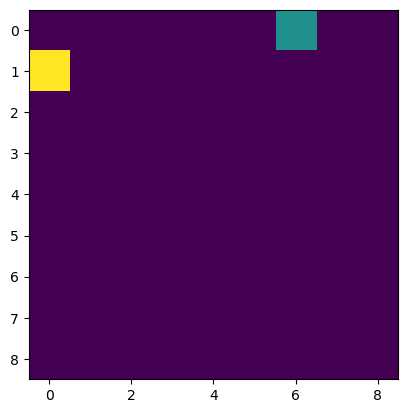

distances_from_wall: [7, 13, 3, 9]
Action: 1 -> (down), Reward: -0.01, Done: False
               STATE REPRESENTATION               

Position Relative to Food:
--------------------------------------------------
  dx_to_food         : -0.6667
  dy_to_food         : 0.0000
  dir_x_normalized   : -1.0000
  dir_y_normalized   : 0.0000

Direction Indicators:
--------------------------------------------------
  up_indicator       : 0.0000 ✗
  down_indicator     : 0.0000 ✗
  left_indicator     : 1.0000 ✓
  right_indicator    : 0.0000 ✗

Distance Metrics:
--------------------------------------------------
  distance_from_mice : 6.0000
  distance_from_wall : 3.0000
  direction_from_wall: 2.0000 left

Snake Properties:
--------------------------------------------------
  snake_length       : 1.0000



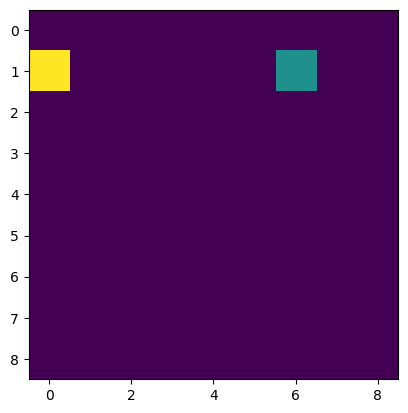

In [15]:
# Take a random action
action = random.choice(snake.action_space)
next_state, reward, done, _ = snake.step(action)

print(f"Action: {action} -> ({action_to_str[action]}), Reward: {reward}, Done: {done}")
print(display_state_vector(next_state))
plt.imshow(snake.render())
plt.show()

# Take a random action
action = random.choice(snake.action_space)
next_state, reward, done, _ = snake.step(action)

print(f"Action: {action} -> ({action_to_str[action]}), Reward: {reward}, Done: {done}")
print(display_state_vector(next_state))
plt.imshow(snake.render())
plt.show()


### Training a new policy with our environment.

We have added directional encoding now, adding 4 more features to our state vector

In [124]:
from tqdm import tqdm

In [37]:
weights = np.array([[ -16.02748835,    8.23601323,  -51.64082654,   26.33429383,
        -163.46913439,  -85.57276777,  -25.05376042,  -50.56496385],
       [  14.31619454,   -8.72375727,   50.69948697,  -33.2631119 ,
         177.68314688,   71.23679828,   28.09848487,   50.83779867],
       [  10.29696445,  -14.75461096,   31.22315627,  -50.55262326,
        -182.69869001,  -54.51717696,  -28.16040145,  -50.06305524],
       [ -10.04799741,   14.78773307,  -31.0360981 ,   56.32954927,
         169.09041142,   69.28591554,   25.19445267,   50.83744579]])
weights

array([[ -16.02748835,    8.23601323,  -51.64082654,   26.33429383,
        -163.46913439,  -85.57276777,  -25.05376042,  -50.56496385],
       [  14.31619454,   -8.72375727,   50.69948697,  -33.2631119 ,
         177.68314688,   71.23679828,   28.09848487,   50.83779867],
       [  10.29696445,  -14.75461096,   31.22315627,  -50.55262326,
        -182.69869001,  -54.51717696,  -28.16040145,  -50.06305524],
       [ -10.04799741,   14.78773307,  -31.0360981 ,   56.32954927,
         169.09041142,   69.28591554,   25.19445267,   50.83744579]])

In [16]:
snake.observation_space.shape

(12,)

### Episodic Training

Episode Training:   3%|▎         | 261/10000 [00:00<00:07, 1350.72it/s]


            Episode: 0
            Average Reward: -1.21
            Total Reward: -1.21


Episode Training:  13%|█▎        | 1253/10000 [00:00<00:06, 1294.95it/s]


            Episode: 1000
            Average Reward: -0.9406493506493507
            Total Reward: -1.07


Episode Training:  21%|██▏       | 2138/10000 [00:01<00:06, 1134.11it/s]


            Episode: 2000
            Average Reward: -0.9226186906546726
            Total Reward: -1.08


Episode Training:  32%|███▏      | 3197/10000 [00:02<00:05, 1303.21it/s]


            Episode: 3000
            Average Reward: -0.8781806064645119
            Total Reward: -0.07000000000000006


Episode Training:  42%|████▏     | 4196/10000 [00:03<00:04, 1324.51it/s]


            Episode: 4000
            Average Reward: -0.8120644838790302
            Total Reward: -1.04


Episode Training:  51%|█████▏    | 5143/10000 [00:04<00:05, 919.37it/s] 


            Episode: 5000
            Average Reward: -0.6712197560487901
            Total Reward: 1.9300000000000002


Episode Training:  61%|██████    | 6105/10000 [00:05<00:04, 956.07it/s]


            Episode: 6000
            Average Reward: -0.45642892851191463
            Total Reward: -0.030000000000000027


Episode Training:  72%|███████▏  | 7161/10000 [00:07<00:03, 763.73it/s]


            Episode: 7000
            Average Reward: -0.2562105413512355
            Total Reward: 0.9199999999999999


Episode Training:  81%|████████▏ | 8147/10000 [00:08<00:02, 715.07it/s]


            Episode: 8000
            Average Reward: -0.02398700162479668
            Total Reward: -0.06000000000000005


Episode Training:  91%|█████████ | 9108/10000 [00:09<00:01, 720.53it/s]


            Episode: 9000
            Average Reward: 0.15350072214198446
            Total Reward: 3.7100000000000026


Episode Training: 100%|██████████| 10000/10000 [00:11<00:00, 882.98it/s]


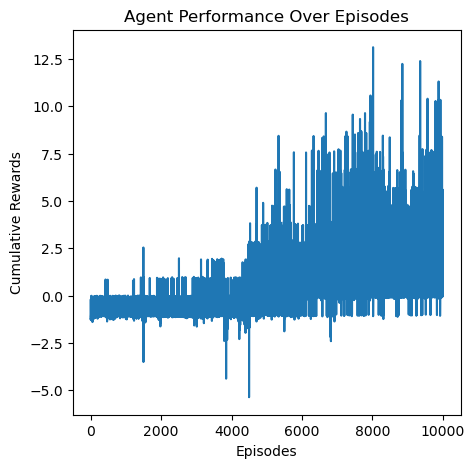

Overall Snake score: 6


In [126]:
state, reward, done, _ = snake.reset()

#Initialize weights randomly → shape: (num_actions, num_features)
weights = np.random.uniform(low=-1, high=1, size=(4, 8))
weights = np.random.normal(0, 0.1, size=(4, 12))
learning_rate = 0.01
gamma = 0.99 # discount factor

# init_action, _ = choose_action(state, weights)
# print('Init Action: ', action, '--> ',action_map[init_action])

action_count = 0
all_reward = 0
all_episode_rewards = []
all_episode_grids = []
all_episode_probs = []
all_episode_grads = []


def choose_action(state, weights):
    # Compute action probabilities using softmax(weights @ state)
    dot_product = np.dot(weights, state)
    # Sample action from probabilities
    prob = softmax(dot_product)
    action = np.random.choice(len(prob), p=prob)
    # action = np.argmax(prob)
    return action, prob

def computed_discounted_rewards(rewards, gamma=0.99):
    discounted = np.zeros_like(rewards)
    cummulative = 0.0
    for i in reversed(range(len(rewards))):
        cummulative = cummulative * gamma + rewards[i]
        discounted[i] = cummulative
  
    mean = np.mean(discounted)
    std = np.std(discounted)
    discounted = (discounted - mean) / (std + 1e-10)
    
    return discounted


def compute_gradients(discounted_rewards, ep_gradients):
    grads = np.vstack(ep_gradients)
    weighted_grads = np.dot(discounted_rewards, grads)
    return weighted_grads
    
N_EPISODES = 10000
log_every = 1000
for episode in tqdm(range(N_EPISODES), desc="Episode Training"):
	# Reset environment
    state, reward, done, _ = snake.reset()  # Get initial state
    done = False 
    episode_states = [state]
    episode_actions = []
    episode_probs = []
    episode_grids = [snake.render()]

    episode_rewards, episode_gradients = [], []
    
    while not done:
        # k = np.random.randint(0, 1000)
        # if k % 7 == 0:
        #     action = random.choice(snake.action_space)
        #     prob = np.ones_like(snake.action_space) / len(snake.action_space)
        # else:
        action, prob = choose_action(state, weights)
        # Take action in environment → get next_state, reward, done
        next_state, reward, done, _ = snake.step(action)
        
        # if reward == 1:
        #     print('Yummy!')                    
        episode_states.append(next_state)
        episode_rewards.append(reward)
        episode_actions.append(action)
        episode_probs.append(prob)
        episode_grids.append(snake.render())
        
        # Update state
        state = next_state
    
    #  Compute discounted cumulative rewards G_t from rewards
    discounted_rewards = computed_discounted_rewards(episode_rewards)  # G_t 
    
    total_grad = np.zeros_like(weights)
    for i in range(len(episode_rewards)):
        # Gradient Calcuation
        action_taken = episode_actions[i]
        dlog = -episode_probs[i]
        dlog[action_taken] += 1
        grad = np.outer(dlog, episode_states[i])
        episode_gradients.append(grad)
        # weights += (learning_rate * grad * discounted_rewards[i])
        total_grad += grad * discounted_rewards[i]

    weights += learning_rate * total_grad

    # Compute gradients
    all_episode_rewards.append(sum(episode_rewards))
    all_episode_grids.append(episode_grids)
    all_episode_probs.append(episode_probs)
    all_episode_grads.append(episode_gradients)

    if episode % log_every == 0:
        print(
        f"""
            Episode: {episode}
            Average Reward: {np.mean(all_episode_rewards)}
            Total Reward: {sum(episode_rewards)}"""
        )
        # plt.imshow(snake.render())
        # plt.show()
    
    # For every 10% of episodes, reduce learning rate by 10%
    if episode % (N_EPISODES // 10) == 0:
        learning_rate *= 0.9
    
            
plt.figure(figsize=(5, 5))
plt.plot(all_episode_rewards)
plt.title('Agent Performance Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Rewards')
plt.show()   

print('Overall Snake score:', snake.score)


### Plotting the best Episode

Best Episode: 


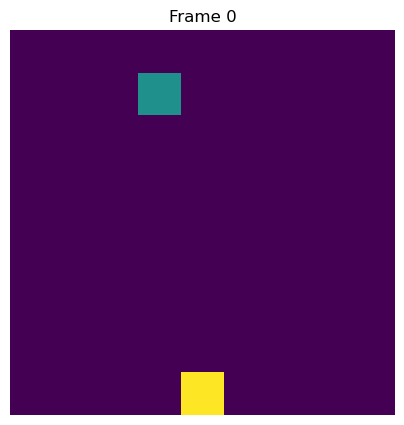

In [127]:
# Optimize this code please
print('Best Episode: ')
# plot the best episode
idx = np.argmax(all_episode_rewards)   
frames = all_episode_grids[idx]
anim = animate_episode(frames)
HTML(anim.to_jshtml())

In [23]:
weights

array([[-20.1111087 ,  -1.3982203 , -53.44434036,  -1.44181506,
         -4.4609752 ,  -1.81203104,   8.28301268,  -2.10175675],
       [ 14.72402472,   6.00923693,  44.69540588,  12.006256  ,
          8.6968225 ,   1.60052413,  -8.22773002,   3.12113925],
       [  5.49971119, -17.95744813,  10.45882438, -48.73595666,
        -12.49582674,  -2.12175094,   3.15461922,  -2.64483644],
       [ -0.80093833,  11.9532408 ,  -3.59122959,  37.44102103,
         10.29443828,  -0.39236337,  -4.53586736,   2.40856818]])

### Animate Episode module

In [128]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display


def animate_episode(episode_grids, interval=200):
    fig = plt.figure(figsize=(5, 5))
    
    def update(frame):
        plt.clf()
        plt.imshow(episode_grids[frame])
        plt.title(f'Frame {frame}')
        plt.axis('off')
        return plt.gca(),
    
    anim = FuncAnimation(fig, update, frames=len(episode_grids), 
                         interval=interval)
    
    # Save as gif
    anim.save('snake_game.gif', writer='pillow')
    
    # Or save as mp4 (requires ffmpeg)
    # anim.save('snake_game.mp4', writer='ffmpeg')
    
    return anim


### Test the weights by running the snake game (without weight update)

Action: down
Action: right
Action: right
Action: right
Action: down
Action: left
Action: down
Action: down
Action: down
Action: down
Action: down
Action: left
Action: left
Action: left
Action: up
Action: right
Action: up
Action: up
Action: down


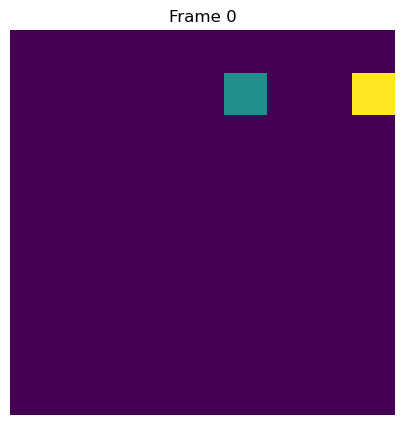

In [131]:
# Use it on your best episode
state, _, done, _ = snake.reset()
def choose_action(state, weights):
    # Compute action probabilities using softmax(weights @ state)
    dot_product = np.dot(weights, state)
    # Sample action from probabilities
    prob = softmax(dot_product)
    action = np.random.choice(len(prob), p=prob)
    # action = np.argmax(prob)
    return action, prob

action_map = {
    0: 'up',
    1: 'down',
    2: 'left',
    3: 'right',
}
frames = []
done = False
for ep in range(10000):
    action, prob = choose_action(state, weights)
    print('Action:', action_map[action])
    # Take action in environment → get next_state, reward, done
    next_state, reward, done, _ = snake.step(action)
    state = next_state
    if done:
        break
    else:
        frames.append(snake.render())

anim = animate_episode(frames)
HTML(anim.to_jshtml())

# Solving Distance metrics 
Grid vs Numpy Representation Issue

### Snake Environment Updates

In [ ]:
from collections import deque  
import numpy as np
import matplotlib.pyplot as plt
import random
from math import sqrt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

def manhattan(a, b):
    return sum(abs(val1-val2) for val1, val2 in zip(a, b))

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))  # Subtracting the max value for numerical stability
    return e_x / e_x.sum()

def animate_episode(episode_grids, interval=200):
    fig = plt.figure(figsize=(5, 5))
    
    def update(frame):
        plt.clf()
        plt.imshow(episode_grids[frame])
        plt.title(f'Frame {frame}')
        plt.axis('off')
        return plt.gca(),
    
    anim = FuncAnimation(fig, update, frames=len(episode_grids), 
                         interval=interval)
    
    # Save as gif
    anim.save('snake_game.gif', writer='pillow')
    
    # Or save as mp4 (requires ffmpeg)
    # anim.save('snake_game.mp4', writer='ffmpeg')
    
    return anim

action_to_str = {
    0: 'up',
    1: 'down',
    2: 'left',
    3: 'right',
}


class Snake:
    def __init__(self, grid_size):  
        self.grid_size = grid_size
        self.reset()

        self.action_space = [0, 1, 2, 3]  # up, down, left, right
        self.action_map = {
            0: (-1, 0),
            1: (1, 0),
            2: (0, -1),
            3: (0, 1),
        }

        self.feature_names = [
            "dx_to_food",
            "dy_to_food",
            "dir_x_normalized",
            "dir_y_normalized",
            "up_indicator",
            "down_indicator",
            "left_indicator",
            "right_indicator",
            "distance_from_mice",
            "distance_from_wall",
            "direction_from_wall",
            "snake_length"
        ]
        
    def _get_snake_distance_from_mice(self):
        dy = (self.mice[0] - self.snake[0][0]) / self.grid_size  # dx_to_food
        dx = (self.mice[1] - self.snake[0][1]) / self.grid_size  # dt_to_food
        return dx, dy
        
    def build_observation_space(self):
        '''    
        dx, dy = distance from snake head to mice    
        distance_from_mice = manhatten_distance from mice to snake head
        distance_from_wall = manhatten_distance from wall to snake head
        direction_from_wall = direction from wall to snake head
        snake_length = length of the snake vector
        '''
        distance_from_mice = manhattan(
            self.snake[0], self.mice
        )        
        # Calculate direct distances to each wall
        snake_y, snake_x = self.snake[0]
        
        distances_from_wall = [
            snake_y,                    # Distance to top wall (0)
            self.grid_size - 1 - snake_y,  # Distance to bottom wall (1)
            snake_x,                    # Distance to left wall (2)
            self.grid_size - 1 - snake_x   # Distance to right wall (3)
        ]
                
        distance_from_wall = min(distances_from_wall)
        direction_from_wall = np.argmin(distances_from_wall)
        
        dx, dy = self._get_snake_distance_from_mice()
        magnitude = max(np.sqrt(dx**2 + dy**2), 1e-5)
        dir_x, dir_y = dx / magnitude, dy / magnitude  
        
        # Create directional indicators (1 if food is in that direction, 0 otherwise)
        # These help the agent learn which direction to move more explicitly
        snake_y, snake_x = self.snake[0]
        mice_y, mice_x = self.mice
        # print(snake_x, snake_y, mice_x, mice_y)
        up_indicator = 1.0 if mice_y < snake_y else 0.0
        down_indicator = 1.0 if mice_y > snake_y else 0.0
        left_indicator = 1.0 if mice_x < snake_x else 0.0
        right_indicator = 1.0 if mice_x > snake_x else 0.0
         
        snake_length = len(self.snake)
        self.observation_space = (
            dx, dy,
            dir_x, dir_y,
            up_indicator, down_indicator, left_indicator, right_indicator,
            distance_from_mice,
            distance_from_wall,
            direction_from_wall,
            snake_length,
        )
        # print('self.observation_space: ', self.observation_space)
        return np.array(self.observation_space)

    def get_state(self):
        self.observation_space = self.build_observation_space()
        return self.observation_space

    def reset(self):     
        self.done = False
        self.score = 0
        self.snake = deque([(
            np.random.randint(0, self.grid_size - 1),
            np.random.randint(0, self.grid_size - 1),
        )])
        self.spawn_mice()
        self.observation_space = self.build_observation_space()
        return self.get_state(), 0, False, {}

    def step(self, action):  
        dx, dy = self.action_map[action]

        # Check if we take action and snake dies?
        # adds the action to the current position
        new_head_x = self.snake[0][0] + dx
        # adds the action to the current position
        new_head_y = self.snake[0][1] + dy

        if (
            new_head_x < 0 or new_head_y < 0 or 
            new_head_x >= self.grid_size or new_head_y >= self.grid_size
        ):
            self.done = True
            return self.get_state(), -1, self.done, {}  # state, reward, done, info

        # check if snake ate itself
        if (new_head_x, new_head_y) in self.snake:
            self.done = True
            return self.get_state(), -1, self.done, {}  # state, reward, done, info

        # If snake does not die and its a valid move
        # move snake
        self.snake.appendleft((new_head_x, new_head_y))

        # check if snake ate the mice
        if (new_head_x, new_head_y) == self.mice:
            self.score += 1
            self.spawn_mice()  # spawns new mice
            return self.get_state(), 1, self.done, {}
        else:
            self.snake.pop()  # remove tail - simulates movement
            # to encourage faster food acquisition we will reinforce a small penalty for every step
            # if snake moves closer to mice, give slightly positive reward else slightly negative reward
            prev_distance = manhattan(self.snake[0], self.mice)
            new_distance = manhattan((new_head_x, new_head_y), self.mice)
            if new_distance < prev_distance:
                reward = 0.02
            else:
                reward = -0.01
            return self.get_state(), reward, self.done, {}

    def render(self):        
        # Create a gridxgrid matrix of all zeros
        grid = np.zeros((self.grid_size, self.grid_size))
        # puts 1 wherever the snake is
        for x, y in self.snake:
            grid[x, y] = 1

        # puts 2 where the mice is
        grid[self.mice[0], self.mice[1]] = 2
        return grid

    def spawn_mice(self):
        # should check for snake position
        all_positions = set(
            (x, y) for x in range(self.grid_size) for y in range(self.grid_size)
        )
        occupied_by_snake = set(self.snake)
        free_positions = all_positions - occupied_by_snake
        if not free_positions:
            self.done = True
            self.mice = None
        else:
            self.mice = random.choice(list(free_positions))
        return self.mice
    
    def __repr__(self):
        """Return a string representation of the Snake environment."""
        head_pos = self.snake[0] if self.snake else "None"
        return (f"Snake(grid_size={self.grid_size}, "
                f"score={self.score}, "
                f"snake_length={len(self.snake)}, "
                f"head_pos={head_pos}, "
                f"mice_pos={self.mice}, "
                f"done={self.done})")

    def display_state(self, state=None):
        """
        Display the state in a human-readable format with feature names.

        Args:
            state: The state to display. If None, uses the current state.

        Returns:
            A formatted string representation of the state.
        """
        if state is None:
            state = self.observation_space

        # Ensure state is a numpy array
        state = np.array(state)

        # Create a formatted string with feature names and values
        lines = []
        lines.append("=" * 50)
        lines.append("STATE REPRESENTATION".center(50))
        lines.append("=" * 50)

        # Calculate the maximum length of feature names for alignment
        max_name_length = max(len(name) for name in self.feature_names)

        # Group related features
        groups = {
            "Position Relative to Food": ["dx_to_food", "dy_to_food", "dir_x_normalized", "dir_y_normalized"],
            "Direction Indicators": ["up_indicator", "down_indicator", "left_indicator", "right_indicator"],
            "Distance Metrics": ["distance_from_mice", "distance_from_wall", "direction_from_wall"],
            "Snake Properties": ["snake_length"]
        }

        # Display features by group
        for group_name, feature_list in groups.items():
            lines.append(f"\n{group_name}:")
            lines.append("-" * 50)

            for feature in feature_list:
                idx = self.feature_names.index(feature)
                if idx < len(state):
                    value = state[idx]
                    # Format the value based on its type
                    if isinstance(value, (int, np.integer)):
                        value_str = f"{value}"
                    else:
                        value_str = f"{value:.4f}"

                    # Add color indicators for binary features (0 or 1)
                    if feature.startswith(("up_", "down_", "left_", "right_", "danger_")):
                        if value > 0.5:  # Activated
                            indicator = "✓"
                        else:  # Not activated
                            indicator = "✗"
                        lines.append(
                            f"  {feature.ljust(max_name_length)}: {value_str} {indicator}")
                    else:
                        if feature.startswith('direction_'):
                            lines.append(
                                f"  {feature.ljust(max_name_length)}: {value_str} {action_to_str[value]}")
                        else:
                            lines.append(
                                f"  {feature.ljust(max_name_length)}: {value_str}")

        lines.append("\n" + "=" * 50)

        # Join all lines and return
        return "\n".join(lines)



In [ ]:
def test_wall_distance_calculation():
    """Test function to verify wall distance calculations."""
    env = Snake(grid_size=9)

    # Test specific positions
    test_positions = [
        (0, 6),  # Top wall
        (8, 3),  # Bottom wall
        (4, 0),  # Left wall
        (2, 8),  # Right wall
        (0, 0),  # Top-left corner
        (8, 8),  # Bottom-right corner
        (4, 4)   # Center
    ]

    for pos in test_positions:
        # Set snake head position manually
        env.snake = deque([pos])

        # Calculate distances
        snake_y, snake_x = pos
        distances = [
            snake_y,                   # Distance to top wall
            env.grid_size - 1 - snake_y,  # Distance to bottom wall
            snake_x,                   # Distance to left wall
            env.grid_size - 1 - snake_x   # Distance to right wall
        ]

        # Get state
        state = env.get_state()

        print(f"\nSnake head at {pos}:")
        print(f"Distances to walls [top, bottom, left, right]: {distances}")
        print(f"Minimum distance: {min(distances)}")
        print(f"Closest wall: {action_to_str[np.argmin(distances)]}")
        print(env.display_state(state))

        # Render grid
        plt.figure(figsize=(4, 4))
        plt.imshow(env.render())
        plt.title(f"Snake at {pos}")
        plt.show()


In [39]:
# test_wall_distance_calculation()

### Test the environment

In [ ]:
# env = Snake(grid_size=9)
# state, _, _, _ = env.reset()
# print(env)
# print(env.display_state(state))
# print("Grid:")
# plt.figure(figsize=(6, 6))
# plt.imshow(env.render())
# plt.title("Initial State")
# plt.show()

# for i in range(2):
#     print('='*20)
#     print(f'Step {i}')
#     # Take a random a\ction
#     action_idx = random.choice(env.action_space)
#     action_name = ["up", "down", "left", "right"][action_idx]
#     next_state, reward, done, _ = env.step(action_idx)

#     print(f"\nAction taken: {action_name} (index: {action_idx})")
#     print(f"Reward: {reward}, Done: {done}")

#     # Display the new state
#     print(env.display_state(next_state))
#     # Show the updated grid
#     plt.figure(figsize=(6, 6))
#     plt.imshow(env.render())
#     plt.title(f"After {action_name} action")
#     plt.show()

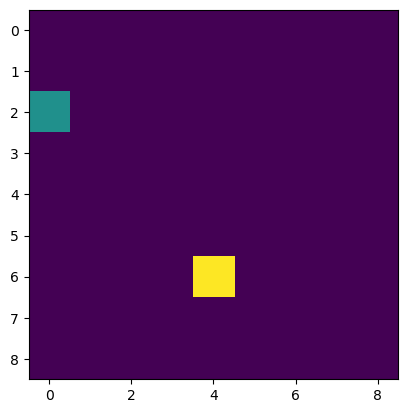

In [40]:
snake = Snake(9)
plt.imshow(snake.render())

### Training 

In [35]:
from tqdm import tqdm

Episode Training:   3%|▎         | 256/10000 [00:00<00:07, 1268.94it/s]


            Episode: 0
            Average Reward: -1.21
            Total Reward: -1.21


Episode Training:  12%|█▏        | 1231/10000 [00:00<00:05, 1646.89it/s]


            Episode: 1000
            Average Reward: -0.9284815184815185
            Total Reward: -1.04


Episode Training:  22%|██▏       | 2235/10000 [00:01<00:05, 1395.51it/s]


            Episode: 2000
            Average Reward: -0.6832933533233383
            Total Reward: -1.02


Episode Training:  30%|██▉       | 2964/10000 [00:02<00:05, 1286.42it/s]


            Episode: 3000
            Average Reward: -0.43330889703432185
            Total Reward: -0.09000000000000008


Episode Training:  42%|████▏     | 4190/10000 [00:03<00:05, 1066.56it/s]


            Episode: 4000
            Average Reward: -0.14638590352411893
            Total Reward: 0.9099999999999999


Episode Training:  52%|█████▏    | 5157/10000 [00:04<00:04, 984.25it/s] 


            Episode: 5000
            Average Reward: 0.1404779044191163
            Total Reward: 0.81


Episode Training:  61%|██████▏   | 6140/10000 [00:05<00:05, 717.28it/s]


            Episode: 6000
            Average Reward: 0.4915730711548078
            Total Reward: 1.8000000000000007


Episode Training:  71%|███████   | 7118/10000 [00:06<00:04, 674.60it/s]


            Episode: 7000
            Average Reward: 0.7872561062705334
            Total Reward: 4.760000000000003


Episode Training:  81%|████████  | 8094/10000 [00:08<00:03, 581.03it/s]


            Episode: 8000
            Average Reward: 1.0692500937382834
            Total Reward: 5.5400000000000045


Episode Training:  91%|█████████ | 9082/10000 [00:10<00:01, 582.56it/s]


            Episode: 9000
            Average Reward: 1.338827908010222
            Total Reward: 0.8099999999999998


Episode Training: 100%|██████████| 10000/10000 [00:11<00:00, 833.69it/s]


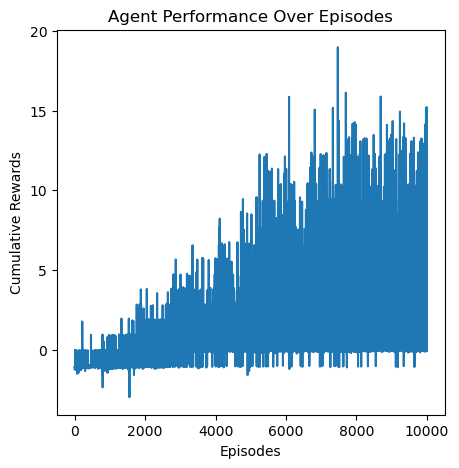

Overall Snake score: 5


In [41]:
state, reward, done, _ = snake.reset()

#Initialize weights randomly → shape: (num_actions, num_features)
weights = np.random.normal(0, 0.1, size=(4, 12))
learning_rate = 0.01
gamma = 0.99 # discount factor

# init_action, _ = choose_action(state, weights)
# print('Init Action: ', action, '--> ',action_map[init_action])

action_count = 0
all_reward = 0
all_episode_rewards = []
all_episode_grids = []
all_episode_probs = []
all_episode_grads = []


def choose_action(state, weights):
    # Compute action probabilities using softmax(weights @ state)
    dot_product = np.dot(weights, state)
    # Sample action from probabilities
    prob = softmax(dot_product)
    action = np.random.choice(len(prob), p=prob)
    # action = np.argmax(prob)
    return action, prob

def computed_discounted_rewards(rewards, gamma=0.99):
    discounted = np.zeros_like(rewards)
    cummulative = 0.0
    for i in reversed(range(len(rewards))):
        cummulative = cummulative * gamma + rewards[i]
        discounted[i] = cummulative
  
    mean = np.mean(discounted)
    std = np.std(discounted)
    discounted = (discounted - mean) / (std + 1e-10)
    
    return discounted


def compute_gradients(discounted_rewards, ep_gradients):
    grads = np.vstack(ep_gradients)
    weighted_grads = np.dot(discounted_rewards, grads)
    return weighted_grads
    
N_EPISODES = 10000
log_every = 1000
for episode in tqdm(range(N_EPISODES), desc="Episode Training"):
	# Reset environment
    state, reward, done, _ = snake.reset()  # Get initial state
    done = False 
    episode_states = [state]
    episode_actions = []
    episode_probs = []
    episode_grids = [snake.render()]

    episode_rewards, episode_gradients = [], []
    
    while not done:
        # k = np.random.randint(0, 1000)
        # if k % 7 == 0:
        #     action = random.choice(snake.action_space)
        #     prob = np.ones_like(snake.action_space) / len(snake.action_space)
        # else:
        action, prob = choose_action(state, weights)
        # Take action in environment → get next_state, reward, done
        next_state, reward, done, _ = snake.step(action)
        
        # if reward == 1:
        #     print('Yummy!')                    
        episode_states.append(next_state)
        episode_rewards.append(reward)
        episode_actions.append(action)
        episode_probs.append(prob)
        episode_grids.append(snake.render())
        
        # Update state
        state = next_state
    
    #  Compute discounted cumulative rewards G_t from rewards
    discounted_rewards = computed_discounted_rewards(episode_rewards)  # G_t 
    
    total_grad = np.zeros_like(weights)
    for i in range(len(episode_rewards)):
        # Gradient Calcuation
        action_taken = episode_actions[i]
        dlog = -episode_probs[i]
        dlog[action_taken] += 1
        grad = np.outer(dlog, episode_states[i])
        episode_gradients.append(grad)
        # weights += (learning_rate * grad * discounted_rewards[i])
        total_grad += grad * discounted_rewards[i]

    weights += learning_rate * total_grad

    # Compute gradients
    all_episode_rewards.append(sum(episode_rewards))
    all_episode_grids.append(episode_grids)
    all_episode_probs.append(episode_probs)
    all_episode_grads.append(episode_gradients)

    if episode % log_every == 0:
        print(
        f"""
            Episode: {episode}
            Average Reward: {np.mean(all_episode_rewards)}
            Total Reward: {sum(episode_rewards)}"""
        )
        # plt.imshow(snake.render())
        # plt.show()
    
    # For every 10% of episodes, reduce learning rate by 10%
    if episode % (N_EPISODES // 10) == 0:
        learning_rate *= 0.9
    
            
plt.figure(figsize=(5, 5))
plt.plot(all_episode_rewards)
plt.title('Agent Performance Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Rewards')
plt.show()   

print('Overall Snake score:', snake.score)


### Plotting the best episode

Best Episode: 


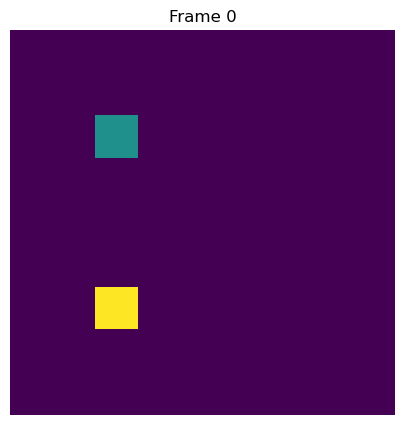

In [42]:
# Optimize this code please
print('Best Episode: ')
# plot the best episode
idx = np.argmax(all_episode_rewards)   
frames = all_episode_grids[idx]
anim = animate_episode(frames)
HTML(anim.to_jshtml())

### Testing the newly generated weights

Action: down
Action: down
Action: left
Action: left
Action: left
Action: left
Action: left
Action: up
Action: up
Action: up
Action: right
Action: up
Action: right
Action: down
Action: down
Action: down
Action: down
Action: down
Action: down
Action: down
Action: right
Action: right
Action: up
Action: up
Action: up
Action: up
Action: up
Action: up
Action: up
Action: right
Action: right
Action: right
Action: down
Action: up


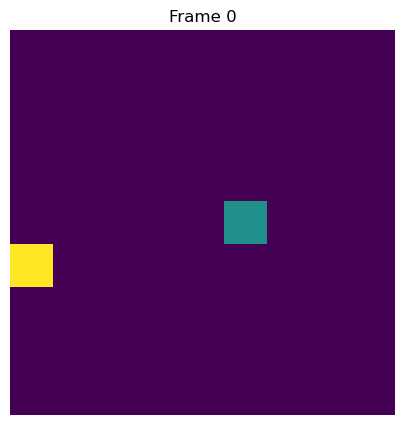

In [ ]:
# Use it on your best episode
state, _, done, _ = snake.reset()
def choose_action(state, weights):
    # Compute action probabilities using softmax(weights @ state)
    dot_product = np.dot(weights, state)
    # Sample action from probabilities
    prob = softmax(dot_product)
    action = np.random.choice(len(prob), p=prob)
    # action = np.argmax(prob)
    return action, prob

action_map = {
    0: 'up',
    1: 'down',
    2: 'left',
    3: 'right',
}
frames = []
done = False
for ep in range(10000):
    action, prob = choose_action(state, weights)
    print('Actions: ' )
    print(action_map[action], '->', end=' ')
    print()
    # Take action in environment → get next_state, reward, done
    next_state, reward, done, _ = snake.step(action)
    state = next_state
    if done:
        break
    else:
        frames.append(snake.render())

anim = animate_episode(frames)
HTML(anim.to_jshtml())